In [15]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Đọc file dữ liệu
df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\VTB.csv")

df = df[['Price','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df1 = df
# Split the data into training, testing, and validation
train_size = int(0.8 * len(df))
test_size = len(df1) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

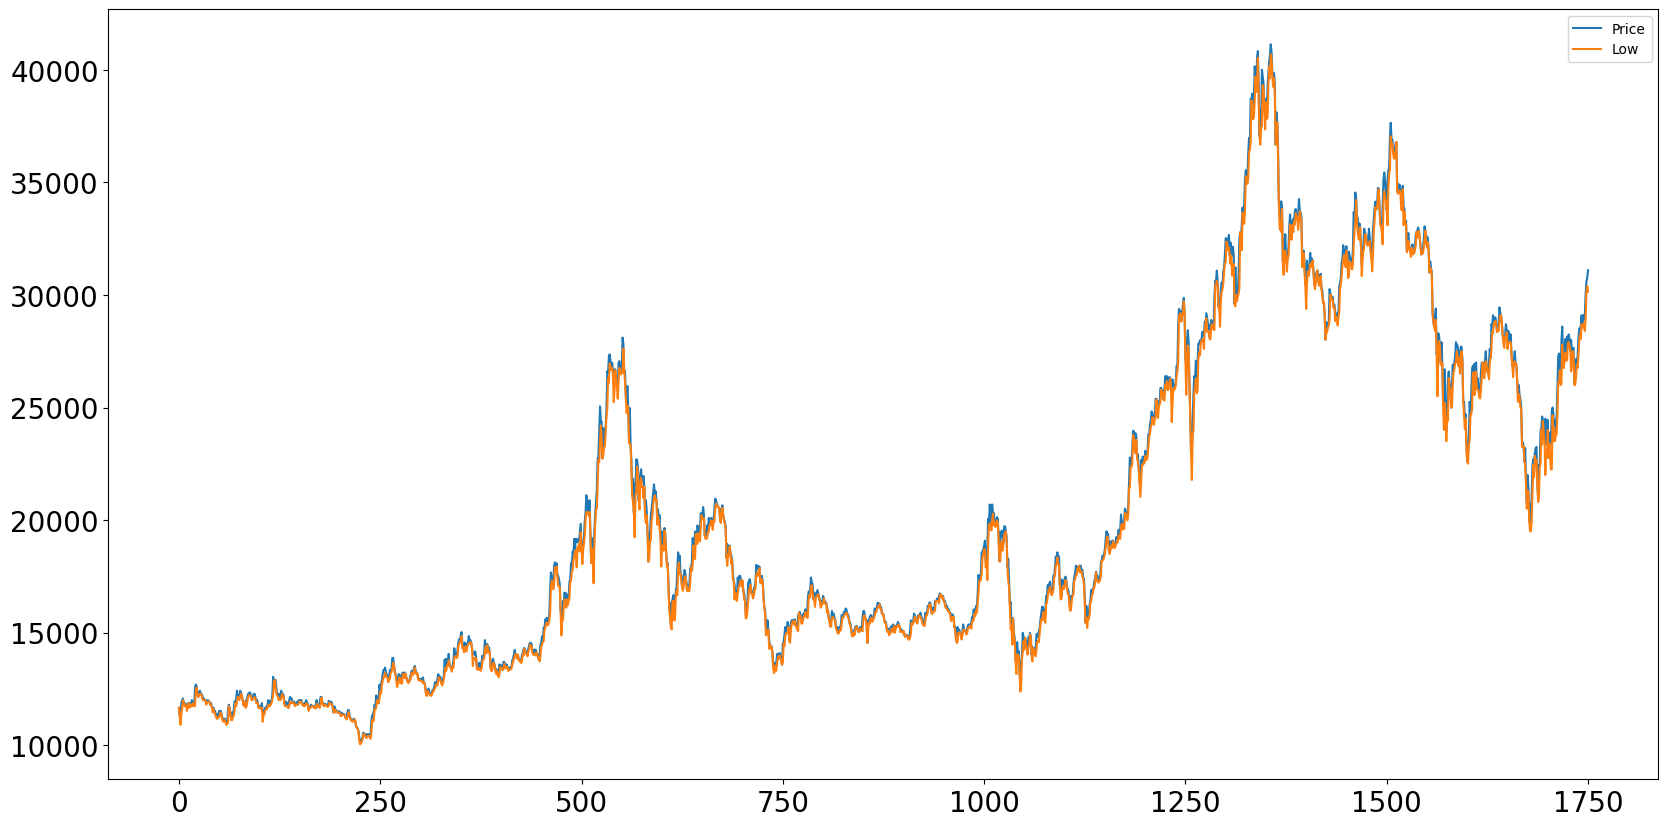

In [17]:
# Xem lại dataset
df.plot(figsize=(20, 10), fontsize=20)
plt.show()

In [18]:
# Tìm m thích hợp
# Dùng adf để kiểm tra xem dataset có stationary hay chưa
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-1.2482487299115146,
 0.6525038496876456,
 1,
 1749,
 {'1%': -3.4340943816187823,
  '5%': -2.8631939359068803,
  '10%': -2.5676505066098376},
 26447.68585277919)

In [19]:
# Vì dataset chưa stationary nên ta thực hiện diff()
df_diff = df1['Price'].diff().dropna()

In [20]:
# Tiếp tục dùng adf để kiểm tra xem p value có < 0.05 ko
adfuller(df_diff)

(-43.48255524609407,
 0.0,
 0,
 1749,
 {'1%': -3.4340943816187823,
  '5%': -2.8631939359068803,
  '10%': -2.5676505066098376},
 26432.797064761224)

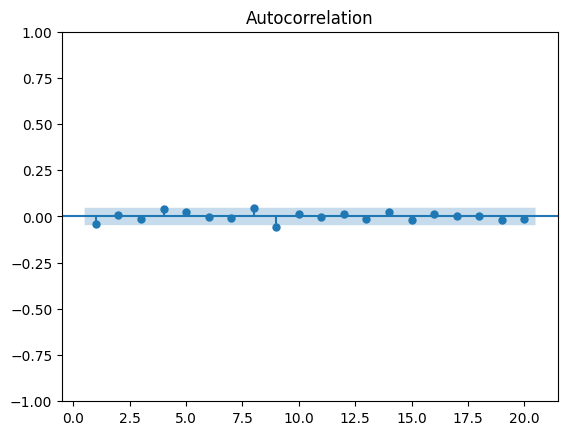

In [21]:
# Sau khi dataset đã stationary vẽ acf để tìm m
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags = 20 , zero = False)
plt.show()

In [22]:
df

,Price,Low
0,11656,11656
1,11311,11242
2,11104,10897
3,11862,11380
4,12000,11587
...,...,...
1746,29100,28400
1747,30000,28900
1748,30600,30100
1749,30750,30400


In [23]:
# Tạo y_train, x_train
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Dùng auto_arima để tìm thông số thích hợp
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = True, m =5)

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=21174.477, Time=2.43 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=21180.109, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=21181.015, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=21181.340, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=21179.260, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=21172.517, Time=1.26 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=21172.731, Time=1.67 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=21174.508, Time=2.69 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=21172.561, Time=1.27 sec
 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=21176.361, Time=2.91 sec
 ARIMA(1,1,2)(0,0,1)[5] intercept   : AIC=21171.043, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[5] intercept   : AIC=21172.001, Time=1.12 sec
 ARIMA(1,1,2)(1,0,1)[5] intercept   : AIC=21173.037, Time=2.35 sec


In [ ]:
# Dùng SARIMAX để train model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y_train, exog = np.array(train_data['Price']), order=(2,1,2), seasonal_order=(1, 0, 0, 5))
model_fit = model1.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Quá trình test
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
exg = np.array(test_data['Low'])
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_test)+len(y_train)-1, exog=exg)
y_pred_test

array([26550., 27200., 27300., 27200., 27100., 27550., 27300., 27100.,
       27150., 26800., 26650., 26550., 26600., 26700., 26900., 26500.,
       26550., 26600., 26600., 26500., 26200., 25700., 25700., 24500.,
       24050., 24400., 25450., 24900., 25300., 25900., 26350., 26200.,
       26200., 26400., 26850., 26200., 25650., 26000., 26000., 25600.,
       25200., 25650., 26000., 26200., 26200., 26500., 26500., 27450.,
       27350., 27300., 27300., 28150., 27700., 27300., 27650., 27700.,
       27600., 27550., 27000., 27900., 28300., 28350., 30350., 30500.,
       29800., 28650., 28750., 29300., 28000., 26400., 26900., 27800.,
       28400., 28400., 28350., 28100., 27700., 28000., 28000., 28150.,
       28200., 27200., 26900., 27400., 27850., 28050., 29500., 29600.,
       30500., 31700., 31700., 32400., 31950., 31150., 31700., 31650.,
       34300., 33750., 32600., 32550., 32700., 31800., 33350., 33000.,
       33000., 34800., 34750., 35200., 35450., 35350., 35000., 34200.,
      

In [ ]:
# Quá trình tạo index predict 30 ngày tiếp theo
# Dùng thuật toán LR để tìm giá trị Low cho 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['Price'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá trị price 30 ngày tiếp theo
price_next_30_days = ln_model.predict(x_next_30_days)

# Predict prices for the next 30 days
y_next_30_days = model_fit.predict(start=len(x_train), end = len(x_train)+ len(x_next_30_days)-1, exog=price_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[19892.16261718 19898.58980804 19905.0169989  19911.44418976
 19917.87138062 19924.29857148 19930.72576234 19937.1529532
 19943.58014406 19950.00733492 19956.43452578 19962.86171663
 19969.28890749 19975.71609835 19982.14328921 19988.57048007
 19994.99767093 20001.42486179 20007.85205265 20014.27924351
 20020.70643437 20027.13362523 20033.56081609 20039.98800695
 20046.41519781 20052.84238867 20059.26957953 20065.69677038
 20072.12396124 20078.5511521 ]


In [ ]:
# Đánh giá độ chính xác thuật toán với MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

# MAPE (thay thế MSE bằng MAPE)
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

# MAE
test_mae = np.mean(np.abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)


Testing RMSE: 625.2919546020298
Testing MAPE: 1.7657113675225298
Testing MAE: 434.33048433048333


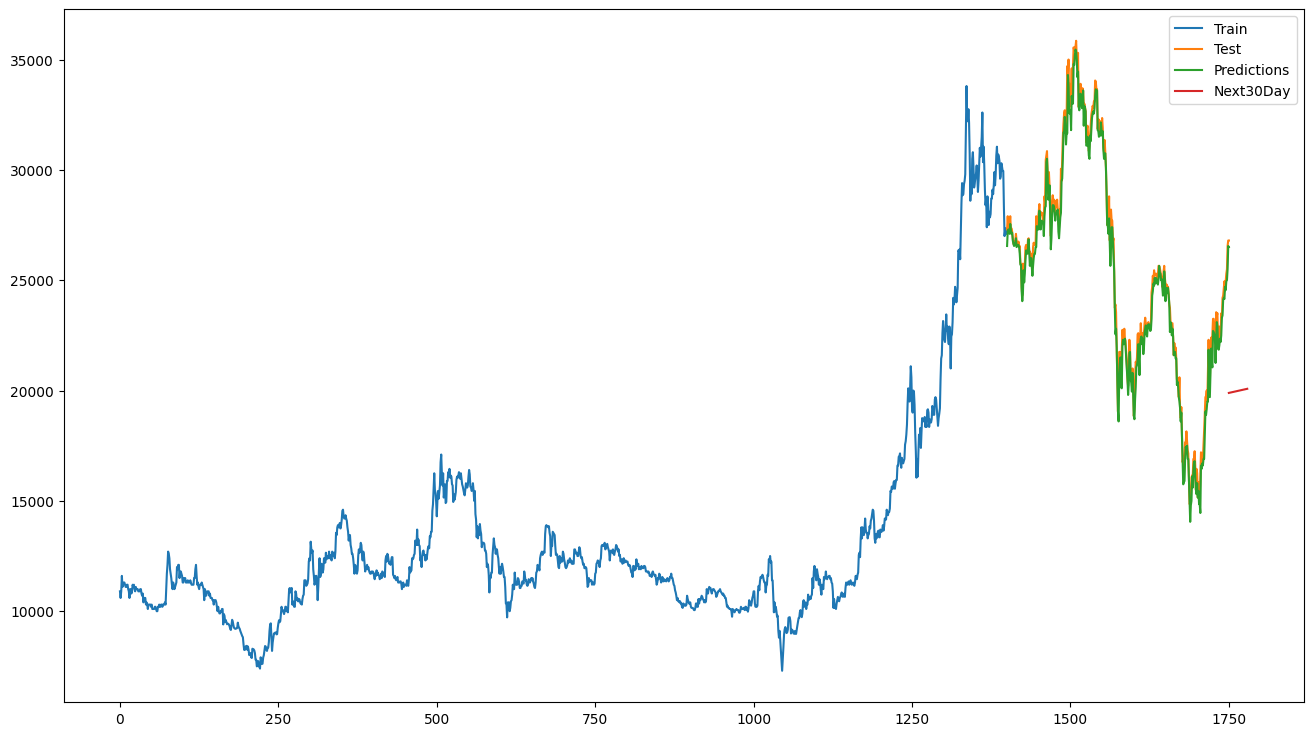

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()